In [131]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [132]:
df=pd.read_csv("/Users/ryanmaroof/ml and dl projects/CustomerSegmentation/ecommerce_customer_churn_10k.csv")

In [133]:
df.head()

,customer_id,signup_date,last_purchase_date,days_since_last_purchase,account_age_days,country,age,gender,device_type,favorite_category,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
0,CUST007563,2024-01-01,2024-02-02,699,32,United States,39,Female,Mobile,Groceries,4,286.08,71.52,0,1
1,CUST007904,2024-01-01,2024-06-28,552,179,France,26,Other,Mobile,Beauty,79,268.42,3.40,0,1
2,CUST005044,2024-01-01,2024-04-29,612,119,Japan,46,Female,Mobile,Fashion,1,60.28,60.28,0,1
3,CUST006602,2024-01-01,2025-03-25,282,449,Germany,34,Female,Tablet,Groceries,1,139.94,139.94,1,1
4,CUST004196,2024-01-01,2024-06-28,552,179,United States,36,Female,Mobile,Home & Garden,1,10.00,10.00,1,1


In [134]:
df.shape

(10000, 15)

In [135]:
df.dtypes

customer_id                  object
signup_date                  object
last_purchase_date           object
days_since_last_purchase      int64
account_age_days              int64
country                      object
age                           int64
gender                       object
device_type                  object
favorite_category            object
total_orders                  int64
total_spent_usd             float64
avg_order_value             float64
is_premium_member             int64
churned                       int64
dtype: object

In [136]:
df.isnull().sum()

customer_id                 0
signup_date                 0
last_purchase_date          0
days_since_last_purchase    0
account_age_days            0
country                     0
age                         0
gender                      0
device_type                 0
favorite_category           0
total_orders                0
total_spent_usd             0
avg_order_value             0
is_premium_member           0
churned                     0
dtype: int64

In [137]:
df['churned'].value_counts()

churned
0    6229
1    3771
Name: count, dtype: int64

In [138]:
df.describe()

,days_since_last_purchase,account_age_days,age,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,118.835500,240.763900,33.885600,7.713700,312.222272,208.596229,0.143900,0.377100
std,169.226426,171.295808,9.465531,29.907347,530.249651,443.111121,0.351006,0.484685
min,1.000000,0.000000,18.000000,1.000000,10.000000,0.030000,0.000000,0.000000
25%,1.000000,97.000000,27.000000,1.000000,65.765000,26.087500,0.000000,0.000000
50%,1.000000,210.000000,34.000000,1.000000,151.000000,78.335000,0.000000,0.000000
75%,208.000000,362.000000,40.000000,3.000000,343.177500,211.305000,0.000000,1.000000
max,719.000000,725.000000,78.000000,300.000000,9564.940000,9564.940000,1.000000,1.000000


array([[<Axes: title={'center': 'days_since_last_purchase'}>,
        <Axes: title={'center': 'account_age_days'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'total_orders'}>,
        <Axes: title={'center': 'total_spent_usd'}>,
        <Axes: title={'center': 'avg_order_value'}>],
       [<Axes: title={'center': 'is_premium_member'}>,
        <Axes: title={'center': 'churned'}>, <Axes: >]], dtype=object)

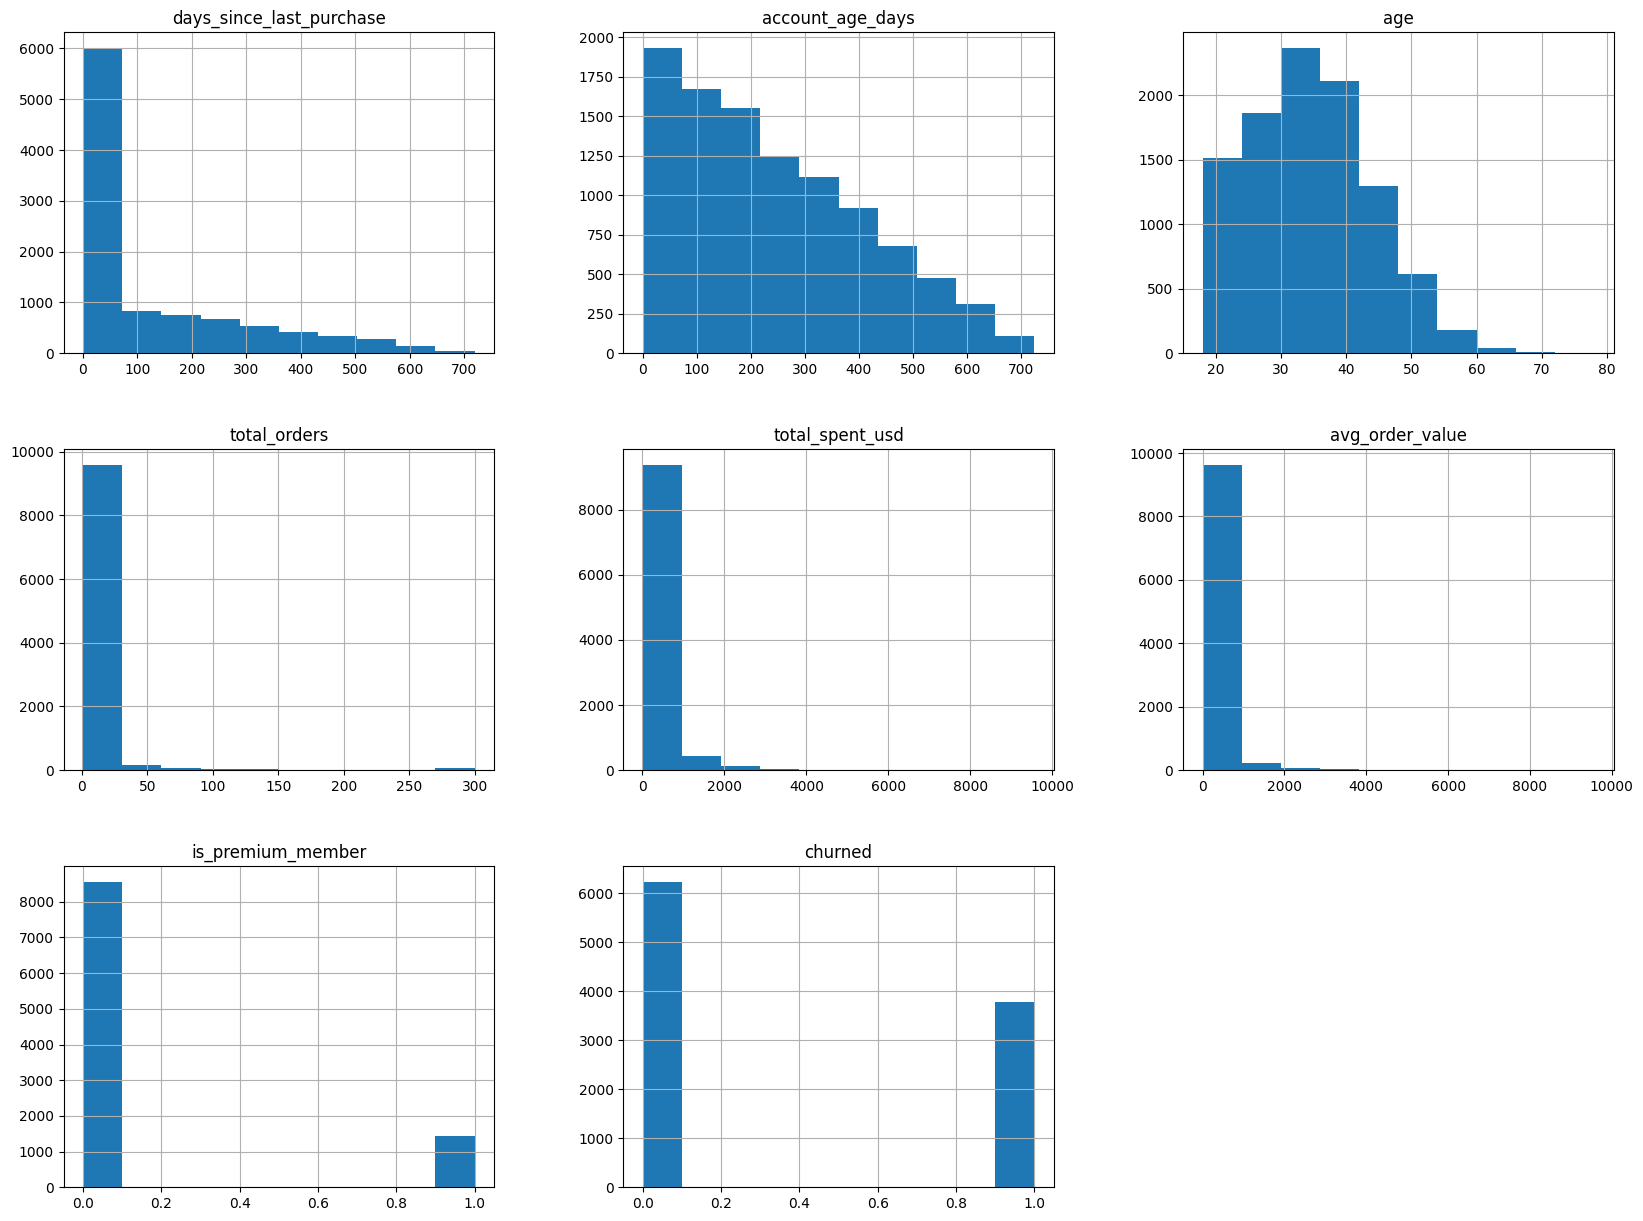

In [139]:
df.hist(figsize=(20,15))

In [140]:
df=df.drop("customer_id",axis=1)

In [141]:
df=df.drop(['signup_date','last_purchase_date'],axis=1)

In [142]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [143]:
scaler=StandardScaler()
le=LabelEncoder()

for col in ['country', 'gender', 'device_type', 'favorite_category']:
    df[col] = le.fit_transform(df[col])

X=scaler.fit_transform(df)

In [144]:
X.shape

(10000, 12)

In [145]:
X[0]

array([ 3.42850419, -1.21879421,  1.2222813 ,  0.54034537, -0.98204639,
        0.4688321 ,  0.37528496, -0.12417971, -0.04930428, -0.30936503,
       -0.40998517,  1.28523013])

In [146]:
from sklearn.cluster import KMeans

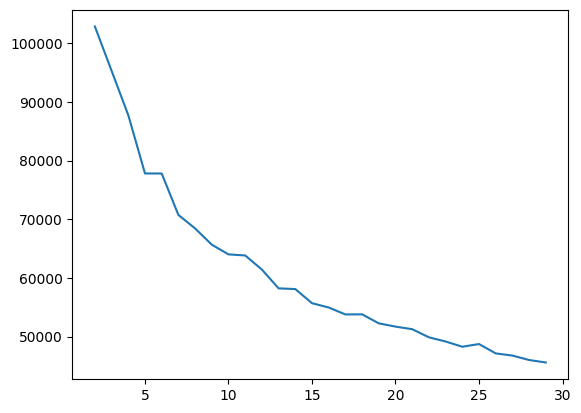

In [147]:
inertis=[]
k_range=range(2,30)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    inertis.append(kmeans.inertia_)

plt.plot(k_range,inertis)
plt.show()



In [148]:
k=7
kmeans=KMeans(n_clusters=k)
df['clusters']=kmeans.fit_predict(X)
print(df.groupby('clusters').mean())

          days_since_last_purchase  account_age_days   country        age  \
clusters                                                                    
0                       111.996321        251.444444  5.377483  34.161884   
1                       367.489099        159.517442  5.160610  33.957122   
2                        13.622367        452.120361  5.544132  33.644433   
3                       256.084687        247.339907  5.683295  33.364849   
4                         6.609527        134.486368  5.388593  34.063303   
5                       119.532189        251.961373  5.309013  34.768240   
6                       104.813008        249.065041  5.390244  34.959350   

            gender  device_type  favorite_category  total_orders  \
clusters                                                           
0         0.520235     0.755703           3.176600      5.069904   
1         0.591570     0.686773           4.894622      4.523256   
2         0.587262     0.766800   

In [149]:
cluster_summary = df.groupby('clusters')[[
    'days_since_last_purchase',  # Recency
    'total_orders',              # Frequency
    'total_spent_usd',           # Monetary
    'avg_order_value',           # Average order size
    'is_premium_member',         # Premium status (0 or 1)
    'churned'                    # Churn rate
]].mean()
print(cluster_summary.round(2))

          days_since_last_purchase  total_orders  total_spent_usd  \
clusters                                                            
0                           112.00          5.07           254.27   
1                           367.49          4.52           254.49   
2                            13.62          4.69           259.17   
3                           256.08          4.52           248.83   
4                             6.61          4.97           248.96   
5                           119.53          3.09          2786.44   
6                           104.81        246.22           301.28   

          avg_order_value  is_premium_member  churned  
clusters                                               
0                  162.09               1.00     0.38  
1                  159.93               0.02     1.00  
2                  165.62               0.00     0.01  
3                  160.84               0.00     1.00  
4                  158.52               0.

In [150]:
segment_names = {
    3: 'Champions',           # Recent (9 days), good orders, 0% churned!
    4: 'Loyal Recent',        # Very recent (8.6 days), good orders, 0% churned
    0: 'Premium At-Risk',     # 100% premium but 37% churned, 103 days ago
    2: 'High-Value Rare',     # HUGE spenders ($2756!) but only 3 orders
    1: 'Lost - Churned',      # 305 days ago, 100% churned
    5: 'Lost - Was Active',   # 316 days, 100% churned, but had 12 orders
    6: 'Hibernating'          # 299 days, 100% churned, low activity
}
df['segment'] = df['clusters'].map(segment_names)

In [151]:
df.head()

,days_since_last_purchase,account_age_days,country,age,gender,device_type,favorite_category,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned,clusters,segment
0,699,32,9,39,0,1,4,4,286.08,71.52,0,1,1,Lost - Churned
1,552,179,3,26,2,1,0,79,268.42,3.40,0,1,3,Champions
2,612,119,6,46,0,1,3,1,60.28,60.28,0,1,1,Lost - Churned
3,282,449,4,34,0,2,4,1,139.94,139.94,1,1,0,Premium At-Risk
4,552,179,9,36,0,1,5,1,10.00,10.00,1,1,0,Premium At-Risk


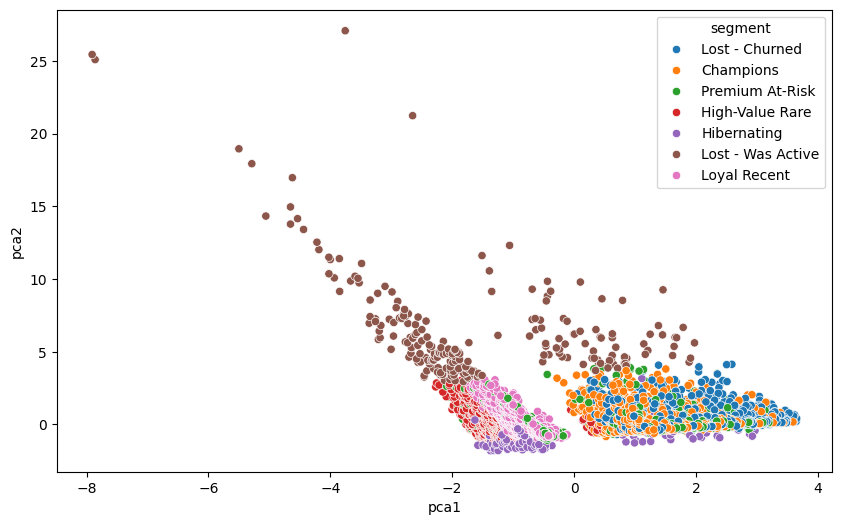

In [152]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
x_pca=pca.fit_transform(X)

df['pca1']=x_pca[:,0]
df['pca2']=x_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='pca1',y='pca2',hue='segment')
plt.show()


In [153]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [154]:
feature_cols=[cols for cols in df.columns if cols not in ['segment','clusters','pca1','pca2']]

X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['clusters'], test_size=0.2, random_state=42)

In [155]:
df.dtypes

days_since_last_purchase      int64
account_age_days              int64
country                       int64
age                           int64
gender                        int64
device_type                   int64
favorite_category             int64
total_orders                  int64
total_spent_usd             float64
avg_order_value             float64
is_premium_member             int64
churned                       int64
clusters                      int32
segment                      object
pca1                        float64
pca2                        float64
dtype: object

In [156]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model.fit(X_train, y_train)

[17:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [157]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9875

In [158]:
df.dtypes

days_since_last_purchase      int64
account_age_days              int64
country                       int64
age                           int64
gender                        int64
device_type                   int64
favorite_category             int64
total_orders                  int64
total_spent_usd             float64
avg_order_value             float64
is_premium_member             int64
churned                       int64
clusters                      int32
segment                      object
pca1                        float64
pca2                        float64
dtype: object

In [159]:

importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print(importance)

                     feature  importance
10         is_premium_member    0.364444
11                   churned    0.288574
1           account_age_days    0.097792
0   days_since_last_purchase    0.093855
6          favorite_category    0.048039
7               total_orders    0.036304
8            total_spent_usd    0.023110
9            avg_order_value    0.022046
4                     gender    0.011334
5                device_type    0.006369
2                    country    0.005007
3                        age    0.003126


In [160]:
churn_features=[cols for cols in feature_cols if cols != 'churned']
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[churn_features], df['churned'], test_size=0.2, random_state=42)

In [161]:
churn_model= XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

In [162]:
churn_model.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [163]:
y_pred2=churn_model.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.9985

In [164]:
importance2 = pd.DataFrame({
    'feature': churn_features,
    'importance': churn_model.feature_importances_
}).sort_values('importance', ascending=False)
print(importance2)

                     feature  importance
0   days_since_last_purchase    0.986717
2                    country    0.002876
9            avg_order_value    0.002194
6          favorite_category    0.002055
8            total_spent_usd    0.001571
3                        age    0.001535
1           account_age_days    0.001258
7               total_orders    0.000939
4                     gender    0.000854
5                device_type    0.000000
10         is_premium_member    0.000000


In [166]:
import joblib
joblib.dump(model,'segment_model.pkl')
joblib.dump(churn_model,'churn_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']